# To predict in vivo TF binding


Features extracted from:
1. Motif scanning
2. MNase-seq
3. RNA-seq
4. Gene annotation


Cell lines:
1. A-549
2. MCF-7
3. HepG2
4. K562
5. HeLa-S3


Held out chrs (did not have the label file):
1. chr1
2. chr8
3. chr20

New held out chrs: chr12



# calculating motif scores for the flanking or target range(11, 17)regions

1. create a directory
2. include the following files in the directory: motif.bash, motif_match.py, motif_match_run.py, motifShell.bash
3. change the 3rd parameter in the motifShell.bash file
4. bash motifShell.bash


In [156]:
# Modules

# import regular expression module
import re

# import sys module
import sys

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
import pandas as pd
import math

import matplotlib.pyplot as plt

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
from sklearn.cross_validation import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFdr

In [6]:
# in data/tss_bed folder
# add new features to *_closest_tss_train_regions.blacklistfiltered_xxx.txt


# merge sdOVerMean.tsv to *_closest_tss_train_regions.blacklistfiltered_xxx.txt
tss_filename='/Users/sunnysun/Desktop/dream_test/new_features/HeLa-S3_closest_tss_train_regions.blacklistfiltered_000.txt'
new_filename='/Users/sunnysun/Desktop/dream_test/new_features/sdOVerMean.tsv'

tss=pd.read_csv(tss_filename,sep='\t',header=None)
new=pd.read_csv(new_filename,sep='\t',header=0)


In [9]:
tss_new=pd.merge(tss,new,left_on=6,right_on='gene_id',how='left')

In [18]:
tss_out=tss_new.drop(tss_new.columns[[3,4,5,6,7]],1)

In [19]:
tss_out=tss_out.drop('gene_id',1)

In [21]:
tss_out.columns=['chr','start','end','gene_expression','distance_to_tss','exp_sd','exp_mean','exp_sdOverMean']

# create train and test datasets from balanced file

In [117]:
data=pd.read_csv('/Users/sunnysun/Desktop/dream_test/combine/1to10/feature_K562_balanced_1to10_rmna.txt',sep='\t',header=None)
col=pd.read_csv('/Users/sunnysun/Desktop/dream_test/new_combined_features_000.txt',sep='\t',header=0)
train = data.sample(frac=0.9)
train.columns=col.columns
test = data.loc[~data.index.isin(train.index)]
test.columns=col.columns
train.to_csv('/Users/sunnysun/Desktop/dream_test/combine/1to10/feature_K562_balanced_1to10_train.txt',index=False,header=True,sep='\t')
test.to_csv('/Users/sunnysun/Desktop/dream_test/combine/1to10/feature_K562_balanced_1to10_test.txt',index=False,header=True,sep='\t')

In [21]:
data=pd.read_csv('/Users/sunnysun/Desktop/dream_test/feature_MCF-7_balanced.txt',sep='\t',header=None)
col=pd.read_csv('/Users/sunnysun/Desktop/dream_test/new_combined_features_000.txt',sep='\t',header=0)
train = data.sample(frac=0.9)
train.columns=col.columns
test = data.loc[~data.index.isin(train.index)]
test.columns=col.columns
train.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_MCF-7_balanced_train.txt',index=False,header=True,sep='\t')
test.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_MCF-7_balanced_test.txt',index=False,header=True,sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
data=pd.read_csv('/Users/sunnysun/Desktop/dream_test/feature_HeLa-S3_balanced.txt',sep='\t',header=None)
col=pd.read_csv('/Users/sunnysun/Desktop/dream_test/new_combined_features_000.txt',sep='\t',header=0)
train = data.sample(frac=0.9)
train.columns=col.columns
test = data.loc[~data.index.isin(train.index)]
test.columns=col.columns
train.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_HeLa-S3_balanced_train.txt',index=False,header=True,sep='\t')
test.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_HeLa-S3_balanced_test.txt',index=False,header=True,sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
data=pd.read_csv('/Users/sunnysun/Desktop/dream_test/feature_K562_balanced.txt',sep='\t',header=None)
col=pd.read_csv('/Users/sunnysun/Desktop/dream_test/new_combined_features_000.txt',sep='\t',header=0)
train = data.sample(frac=0.9)
train.columns=col.columns
test = data.loc[~data.index.isin(train.index)]
test.columns=col.columns
train.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_K562_balanced_train.txt',index=False,header=True,sep='\t')
test.to_csv('/Users/sunnysun/Desktop/dream_test/combine/feature_K562_balanced_test.txt',index=False,header=True,sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# applying machine learning methods

In [463]:
# read in the data
train=pd.read_csv('/Users/sunnysun/Desktop/dream_test/combine/1to10/feature_A549_balanced_1to10_train_rmchr12.txt',sep='\t',header=0)
#test=pd.read_csv('/Users/sunnysun/Desktop/dream_test/combine/1to10/feature_A549_balanced_1to10_test.txt',sep='\t',header=0)
test=pd.read_csv('/Users/sunnysun/Desktop/dream_test/combine/new_combined_features_070_noA_rmna.txt',sep='\t',header=0)
cellline='A549'
train=train.drop("chr",axis=1)
train=train.drop("start",axis=1)
train=train.drop("end",axis=1)
col=pd.read_csv('/Users/sunnysun/Desktop/dream_test/new_combined_features_000.txt',sep='\t',header=0)
test.columns=col.columns
test=test.drop("chr",axis=1)
test=test.drop("start",axis=1)
test=test.drop("end",axis=1)
test=test.loc[test[cellline]!='A',:]

In [464]:
train.shape,test.shape

((901442, 32), (98533, 32))

In [449]:
# convert the categorical data to numeric
#number = preprocessing.LabelEncoder()
#train[cellline] = number.fit_transform(train[cellline])
#test[cellline] = number.fit_transform(test[cellline])

In [465]:
s = pd.Series(train[cellline])
s=s.replace({'B': 1})
s=s.replace({'U': 0})
train[cellline]=s

s = pd.Series(test[cellline])
s=s.replace({'B': 1})
s=s.replace({'U': 0})
test[cellline]=s

In [49]:
# removing NaN
#train=train.dropna()
#test=train.dropna()
#train.to_csv('/Users/sunnysun/Desktop/dream_test/combine/train.txt',index=False,header=True,sep='\t')

In [459]:
# creating train and test datasets
#train = test.sample(frac=0.8)
#test = test.loc[~test.index.isin(train.index)]
# train_df.shape,test_df.shape,alldata.shape

In [466]:
X_train = train.drop(cellline, axis=1)
Y_train = train[cellline]
X_test  = test.drop(cellline, axis=1)
Y_test = test[cellline]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((901442, 31), (901442,), (98533, 31), (98533,))

In [467]:
X_train.head()

,motif_-600,motif_-500,motif_-400,motif_-300,motif_-200,motif_-100,motif_0,motif_100,motif_200,motif_300,...,minus300_minus100,minus200_0,minus100_targetmid,target_region,targetmid_100,plus0_200,plus100_300,plus200_400,plus300_500,plus400_600
0,0.673231,0.673231,0.672335,0.771851,0.771851,0.714365,0.714365,0.741933,0.741933,0.687548,...,2.461996,0.805780,0.815338,0.657540,0.897928,0.942253,0.816286,0.824822,3.527567,10.736500
1,0.726841,0.726841,0.731395,0.731395,0.796827,0.796827,0.800048,0.800048,0.715867,0.728997,...,0.506650,1.002041,1.466003,1.637804,0.798053,0.205408,0.075755,0.109522,0.405664,0.525290
2,0.827447,0.731589,0.797917,0.672384,0.686071,0.780523,0.780523,0.744768,0.720954,0.720954,...,0.932707,1.007249,1.221196,1.253088,1.111324,1.002081,1.240439,1.473601,1.557316,1.590334
3,0.650073,0.644549,0.670543,0.740625,0.818556,0.818556,0.747626,0.747626,0.728924,0.717829,...,0.268178,0.000000,0.000000,0.000000,0.000000,0.000000,0.302375,0.809932,0.507558,0.088193
4,0.685029,0.685029,0.668944,0.668944,0.673256,0.678973,0.725824,0.725824,0.663808,0.755208,...,0.406766,0.237580,0.413966,0.539955,0.309574,0.269977,0.332972,1.175306,1.430886,0.444564


In [468]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict_proba(X_test)
acc_log='{:.2f}'.format(logreg.score(X_test, Y_test))
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1])))
auc_log='{:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test,Y_pred[:,1])
area = auc(recall,precision,reorder=True)
print ('PRC: {:.4f}'.format(area))
prc_log='{:.4f}'.format(area)

AUC: 0.9113
PRC: 0.4538


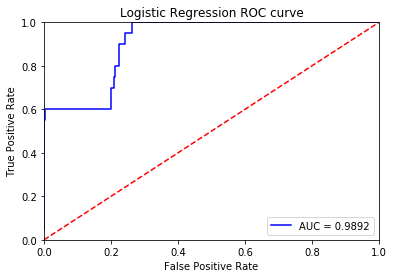

In [471]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:,1])
log_roc_auc = auc(fpr, tpr)

plt.title('Logistic Regression ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

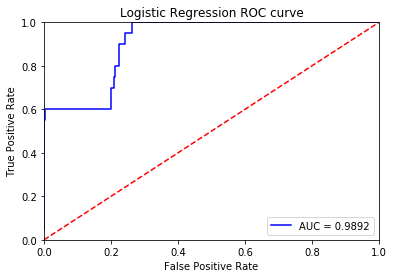

In [472]:
# plot ROC curve
plt.figure()
plt.title('Logistic Regression ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
f = open(cellline+'_log_roc.png', 'wb')
plt.savefig(cellline+'_log_roc.png')
f.close()

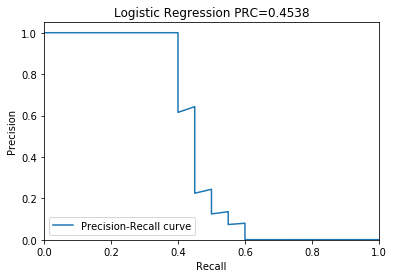

In [473]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Logistic Regression PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [212]:
def recall_at_fdr(y_true, y_pred, fdr_cutoff1=0.05, fdr_cutoff2=0.1, fdr_cutoff3=0.25,fdr_cutoff4=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    fdr = 1- precision
    cutoff_index1 = next(i for i, x in enumerate(fdr) if x <= fdr_cutoff1)
    cutoff_index2 = next(i for i, x in enumerate(fdr) if x <= fdr_cutoff2)
    cutoff_index3 = next(i for i, x in enumerate(fdr) if x <= fdr_cutoff3)
    cutoff_index4 = next(i for i, x in enumerate(fdr) if x <= fdr_cutoff4)
    return (recall[cutoff_index1],recall[cutoff_index2],recall[cutoff_index3],recall[cutoff_index4])

In [274]:
log_fdr_5pct, log_fdr_10pct, log_fdr_25pct, log_fdr_50pct=recall_at_fdr(Y_test,Y_pred[:,1])

In [125]:
# cross-validation
scores = cross_val_score(logreg, X_train, Y_train, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.97128322 0.97304911 0.9747204  0.97730617 0.97034771 0.97560335
 0.98070131 0.973669   0.97157723 0.97682241]


In [ ]:
predictions = cross_val_predict(logreg, X_train, Y_train, cv=10)
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

In [474]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict_proba(X_test)
acc_knn='{:.2f}'.format(knn.score(X_test, Y_test))
#print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
#acc_knn
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1])))
auc_knn='{:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred[:,1])
area = auc(recall,precision,reorder=True)
print ('PRC: {:.4f}'.format(area))
prc_knn='{:.4f}'.format(area)

AUC: 0.7967
PRC: 0.2433


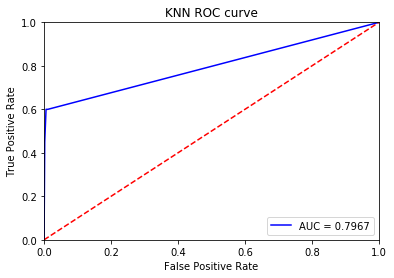

In [478]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:,1])
knn_roc_auc = auc(fpr, tpr)

plt.title('KNN ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

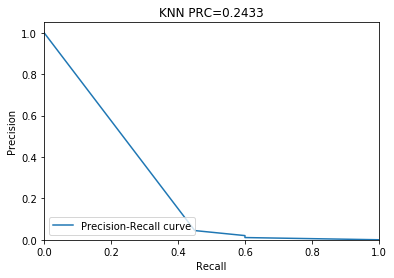

In [477]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('KNN PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [270]:
knn_fdr_5pct, knn_fdr_10pct, knn_fdr_25pct, knn_fdr_50pct=recall_at_fdr(Y_test,Y_pred[:,1])

In [99]:
# cross-validation
scores = cross_val_score(knn, X_train, Y_train, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.96295774 0.96098215 0.9641572  0.96380442 0.96189939 0.96309885
 0.95985041 0.96217628 0.96140004 0.96111778]


In [454]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict_proba(X_test)
#acc_gaussian='{:.2f}'.format(gaussian.score(X_test, Y_test))
#print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(gaussian.score(X_test, Y_test)))
#acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
#acc_gaussian
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1])))
auc_gaussian='{:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred[:,1])
area = auc(recall,precision)
print ('PRC: {:.4f}'.format(area))
prc_gaussian='{:.4f}'.format(area)

AUC: 0.9893
PRC: 0.3065


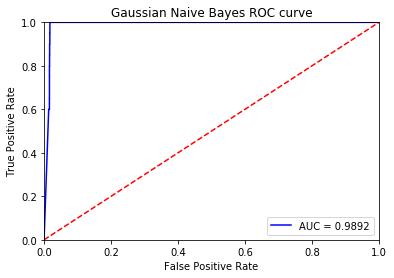

In [457]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred[:,1])
gau_roc_auc = auc(fpr, tpr)

plt.title('Gaussian Naive Bayes ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

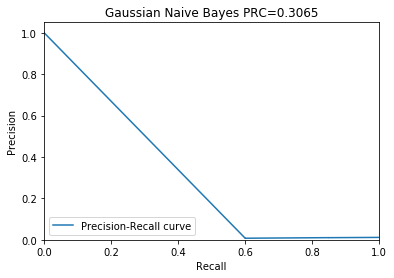

In [458]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Gaussian Naive Bayes PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [266]:
gau_fdr_5pct, gau_fdr_10pct, gau_fdr_25pct, gau_fdr_50pct=recall_at_fdr(Y_test,Y_pred[:,1])

In [323]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict_proba(X_test)
acc_decision_tree='{:.2f}'.format(decision_tree.score(X_test, Y_test))
#print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decision_tree.score(X_test, Y_test)))
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1])))
auc_decision_tree='{:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred[:,1])
area = auc(recall,precision)
print ('PRC: {:.4f}'.format(area))
prc_decision_tree='{:.4f}'.format(area)

AUC: 0.9429
PRC: 0.9717


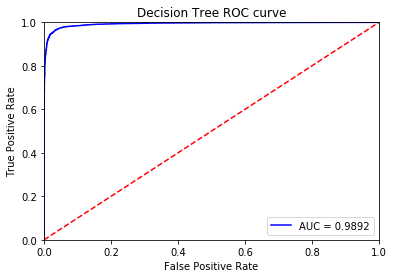

In [324]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred[:,1])
dt_roc_auc = auc(fpr, tpr)

plt.title('Decision Tree ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

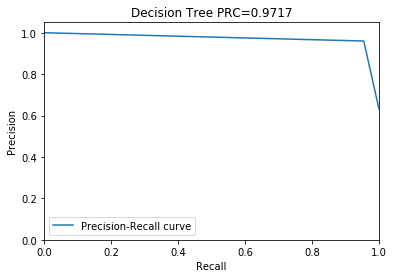

In [325]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Decision Tree PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [262]:
dt_fdr_5pct, dt_fdr_10pct, dt_fdr_25pct, dt_fdr_50pct=recall_at_fdr(Y_test,Y_pred[:,1])

In [326]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict_proba(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest='{:.2f}'.format(random_forest.score(X_test, Y_test))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, Y_test)))
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
#acc_random_forest
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1])))
auc_random_forest='{:.4f}'.format(roc_auc_score(Y_test, Y_pred[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred[:,1])
area = auc(recall,precision)
print ('PRC: {:.4f}'.format(area))
prc_random_forest='{:.4f}'.format(area)

AUC: 0.9941
PRC: 0.9970


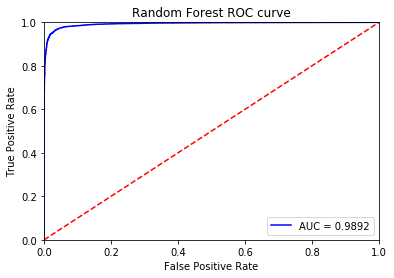

In [327]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred[:,1])
rf_roc_auc = auc(fpr, tpr)

plt.title('Random Forest ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

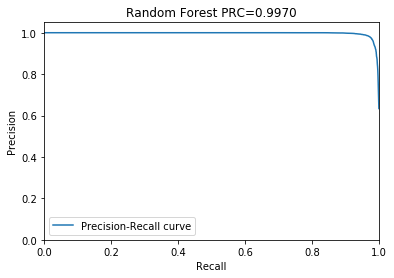

In [328]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Random Forest PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [258]:
rf_fdr_5pct, rf_fdr_10pct, rf_fdr_25pct, rf_fdr_50pct=recall_at_fdr(Y_test,Y_pred[:,1])

In [319]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree','Neural Network','XGboost'],
    'auROC': [knn_roc_auc, log_roc_auc, rf_roc_auc, gau_roc_auc, dt_roc_auc, nn_roc_auc, xg_roc_auc],
    'auPRC': [prc_knn,prc_log,prc_random_forest,prc_gaussian,prc_decision_tree, prc_nn, prc_xgboost],
    'Recall at 5%FDR':[knn_fdr_5pct,log_fdr_5pct,rf_fdr_5pct,gau_fdr_5pct,dt_fdr_5pct,nn_fdr_5pct,xg_fdr_5pct],
    'Recall at 10%FDR':[knn_fdr_10pct,log_fdr_10pct,rf_fdr_10pct,gau_fdr_10pct,dt_fdr_10pct,nn_fdr_10pct,xg_fdr_10pct],
    'Recall at 25%FDR':[knn_fdr_25pct,log_fdr_25pct,rf_fdr_25pct,gau_fdr_25pct,dt_fdr_25pct,nn_fdr_25pct,xg_fdr_25pct],
    'Recall at 50%FDR':[knn_fdr_50pct,log_fdr_50pct,rf_fdr_50pct,gau_fdr_50pct,dt_fdr_50pct,nn_fdr_50pct,xg_fdr_50pct]
                        })
models=models[['Model','auROC','auPRC','Recall at 5%FDR','Recall at 10%FDR','Recall at 25%FDR','Recall at 50%FDR']]
models.sort_values(by='auROC', ascending=False)

,Model,auROC,auPRC,Recall at 5%FDR,Recall at 10%FDR,Recall at 25%FDR,Recall at 50%FDR
6,XGboost,0.993209,0.9942,0.978350,0.987672,0.997294,1.0
0,KNN,0.989243,0.9930,0.961010,0.982460,0.982460,1.0
1,Logistic Regression,0.989243,0.9936,0.981658,0.990378,0.998296,1.0
2,Random Forest,0.989243,0.9971,0.984264,0.991380,0.998396,1.0
3,Naive Bayes,0.989243,0.9870,0.965220,0.978551,0.994888,1.0
4,Decision Tree,0.989243,0.9721,0.954796,0.954796,0.954796,1.0
5,Neural Network,0.989243,0.9942,0.978350,0.987672,0.997294,1.0


# preprocessing the features
# neural network and XGboost


In [137]:
# preprocessing alldata
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
# Now apply the transformations to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# neural network

mlp = MLPClassifier(hidden_layer_sizes=(35,100,35),max_iter=200)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 100, 35), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [281]:
#predictions = mlp.predict(X_test)
#print(confusion_matrix(Y_test,predictions))

[[5478  287]
 [ 332 9645]]


In [284]:
predictions=mlp.predict_proba(X_test)

In [ ]:
#print(classification_report(Y_test,predictions))

In [286]:
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, predictions[:,1])))
auc_nn='{:.4f}'.format(roc_auc_score(Y_test, predictions[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, predictions[:,1])
area = auc(recall,precision)
print ('PRC: {:.4f}'.format(area))
prc_nn=' {:.4f}'.format(area)

AUC: 0.9893
PRC: 0.9942


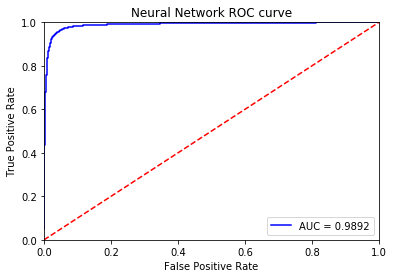

In [287]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred[:,1])
nn_roc_auc = auc(fpr, tpr)

plt.title('Neural Network ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

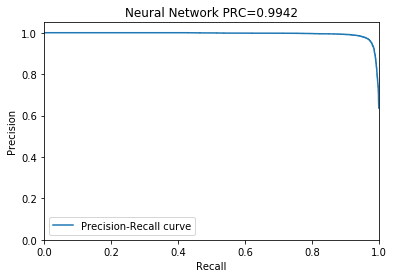

In [288]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Neural Network PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [290]:
nn_fdr_5pct, nn_fdr_10pct, nn_fdr_25pct, nn_fdr_50pct=recall_at_fdr(Y_test,predictions[:,1])

In [357]:
# fit model to training data
model = XGBClassifier(n_estimators=75, subsample=1, seed=1996, gamma=0,objective='binary:logistic',
                      scale_pos_weight=10,max_depth=7, min_child_weight=7,nthread=20)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=7, missing=None, n_estimators=75,
       n_jobs=1, nthread=20, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=1996,
       silent=True, subsample=1)

In [383]:
# make predictions for test data
predictions = model.predict_proba(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(Y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# calculating auc
print ('AUC: {:.4f}'.format(roc_auc_score(Y_test, predictions[:,1])))
auc_xgboost='{:.4f}'.format(roc_auc_score(Y_test, predictions[:,1]))
precision, recall, thresholds = precision_recall_curve(Y_test, predictions[:,1])
area = auc(recall,precision)
print ('PRC: {:.4f}'.format(area))
prc_xgboost='{:.4f}'.format(area)

AUC: 0.9935
PRC: 0.9963


In [375]:
Y_test.shape

(98534,)

In [456]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred[:,1])
xg_roc_auc = auc(fpr, tpr)

plt.title('XGboost ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [98534, 105706]

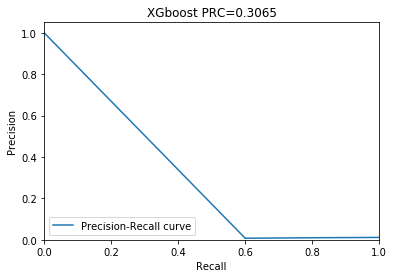

In [455]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('XGboost PRC={0:0.4f}'.format(area))
plt.legend(loc="lower left")
plt.show()

In [297]:
xg_fdr_5pct, xg_fdr_10pct, xg_fdr_25pct, xg_fdr_50pct=recall_at_fdr(Y_test,predictions[:,1])